In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import json
import uuid
import pathlib

from unityagents import UnityEnvironment
import pandas as pd

from drl_cc import tennis
from drl_cc import scores_util as su
from drl_cc import path_util as pu

import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
/home/hm/anaconda3/envs/drlnd/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
tuning_output_dir = pathlib.Path("../training_output/tuning_ddpg")
agent_type = 'DDPG'

In [3]:
default_params = {
    "n_episodes": 3000,
    "update_every": 10,
    "num_updates": 20,
    "buffer_size": 100_000,
    "batch_size": 128,
    "gamma_discount_factor": 0.95,
    "mean_score_threshold": 0.5,
    "max_t": 1000,
    "learning_rate_actor": 3e-3,
    "learning_rate_critic": 1e-3,
    "tau_soft_update": 1e-3,
    "l2_weight_decay": 0,
    "has_ou_noise": True,
    "ou_noise_mu": 0.0,
    "ou_noise_theta": 0.15,
    "ou_noise_sigma_start": 0.3,
    "ou_noise_sigma_end": 0.01,
    "ou_noise_sigma_decay": 0.999,
    "n_random_episodes": 300,
    "agent_seed": 11_111,
    "logging_freq": 1,
}

In [4]:
candidate_params = [
    {
        "update_every": 1,
        "num_updates": 5,
        "ou_noise_sigma_start": 0.4,
        "ou_noise_sigma_end": 0.05,
        "ou_noise_sigma_decay": 0.90,
        "gamma_discount_factor": 0.95,
        "learning_rate_actor": 3e-3,
        "learning_rate_critic": 1e-3,
        "tau_soft_update": 3e-3,
        "buffer_size": 100_000,
        "batch_size": 128,
    },
#     {
#         "update_every": 3,
#         "num_updates": 10,
#         "ou_noise_sigma_start": 0.4,
#         "ou_noise_sigma_end": 0.05,
#         "ou_noise_sigma_decay": 0.90,
#         "gamma_discount_factor": 0.95,
#         "learning_rate_actor": 3e-3,
#         "learning_rate_critic": 1e-3,
#         "tau_soft_update": 3e-3,
#         "buffer_size": 500_000,
#         "batch_size": 512,
#     },
    # not run yet
    {
        "update_every": 2,
        "num_updates": 10,
        "ou_noise_sigma_start": 0.4,
        "ou_noise_sigma_end": 0.05,
        "ou_noise_sigma_decay": 0.90,
        "gamma_discount_factor": 0.95,
        "learning_rate_actor": 3e-3,
        "learning_rate_critic": 1e-3,
        "tau_soft_update": 3e-3,
        "buffer_size": 1_000_000,
        "batch_size": 1024,
    },
#     # solved in 809 with some fluctuation
#     {
#         "update_every": 1,
#         "num_updates": 2,
#         "ou_noise_sigma": 0.1,
#         "gamma_discount_factor": 0.95,
#         "learning_rate_actor": 3e-3,
#         "learning_rate_critic": 1e-3,
#         "tau_soft_update": 1e-2,
#         "buffer_size": 1000_000,
#         "batch_size": 1024,
#     },
#     {
#         "update_every": 4,
#         "num_updates": 2,
#         "ou_noise_sigma": 0.1,
#         "gamma_discount_factor": 0.95,
#         "learning_rate_actor": 3e-3,
#         "learning_rate_critic": 1e-3,
#     },
#     # worked - reached 2.5+
#     {
#         "update_every": 4,
#         "num_updates": 10,
#         "ou_noise_sigma": 0.1,
#         "gamma_discount_factor": 0.95,
#         "learning_rate_actor": 3e-3,
#         "learning_rate_critic": 1e-3,
#     },
#     {
#         "update_every": 4,
#         "num_updates": 10,
#         "ou_noise_sigma": 0.1,
#         "gamma_discount_factor": 0.95,
#         "learning_rate_actor": 1e-2,
#         "learning_rate_critic": 3e-3,
#     },
    
]

In [5]:
env = UnityEnvironment(file_name="../Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


INFO:drl_cc.tennis:Ensuring output directory exists: ../training_output/tuning_ddpg/62c5680b-5abd-405b-aed2-3d8e49659778/001


run #2
{'n_episodes': 3000, 'update_every': 1, 'num_updates': 5, 'buffer_size': 100000, 'batch_size': 128, 'gamma_discount_factor': 0.95, 'mean_score_threshold': 0.5, 'max_t': 1000, 'learning_rate_actor': 0.003, 'learning_rate_critic': 0.001, 'tau_soft_update': 0.003, 'l2_weight_decay': 0, 'has_ou_noise': True, 'ou_noise_mu': 0.0, 'ou_noise_theta': 0.15, 'ou_noise_sigma_start': 0.4, 'ou_noise_sigma_end': 0.05, 'ou_noise_sigma_decay': 0.9, 'n_random_episodes': 300, 'agent_seed': 11111, 'logging_freq': 1}


Ep: 1	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.00	Time_e: 0.078s	Time: 0.078s
Ep: 2	Sigma(30): 0.050	Score: 0.09	Avg. Score: 0.05	Time_e: 0.229s	Time: 0.308s
Ep: 3	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.03	Time_e: 0.052s	Time: 0.361s
Ep: 4	Sigma(24): 0.050	Score: 0.00	Avg. Score: 0.02	Time_e: 0.083s	Time: 0.445s
Ep: 5	Sigma(13): 0.102	Score: 0.00	Avg. Score: 0.02	Time_e: 0.046s	Time: 0.492s
Ep: 6	Sigma(32): 0.050	Score: 0.10	Avg. Score: 0.03	Time_e: 0.116s	Time: 0.608s
Ep: 7	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.03	Time_e: 0.050s	Time: 0.659s
Ep: 8	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.048s	Time: 0.707s
Ep: 9	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.050s	Time: 0.758s
Ep: 10	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.050s	Time: 0.809s
Ep: 11	Sigma(33): 0.050	Score: 0.00	Avg. Score: 0.02	Time_e: 0.108s	Time: 0.918s
Ep: 12	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.046s	Time: 0.965s
Ep: 13	Sigma(14): 0.092	Score: 0.00	A

Ep: 103	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.045s	Time: 6.155s
Ep: 104	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.044s	Time: 6.199s
Ep: 105	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.02	Time_e: 0.050s	Time: 6.250s
Ep: 106	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.02	Time_e: 0.053s	Time: 6.304s
Ep: 107	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.048s	Time: 6.353s
Ep: 108	Sigma(33): 0.050	Score: 0.09	Avg. Score: 0.02	Time_e: 0.101s	Time: 6.454s
Ep: 109	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.046s	Time: 6.501s
Ep: 110	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.047s	Time: 6.548s
Ep: 111	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.02	Time_e: 0.048s	Time: 6.596s
Ep: 112	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.047s	Time: 6.644s
Ep: 113	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.041s	Time: 6.686s
Ep: 114	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.044s	Time: 6.731s
Ep: 115	Sigma(14

Ep: 203	Sigma(32): 0.050	Score: 0.09	Avg. Score: 0.02	Time_e: 0.106s	Time: 12.204s
Ep: 204	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.046s	Time: 12.250s
Ep: 205	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.059s	Time: 12.310s
Ep: 206	Sigma(31): 0.050	Score: 0.09	Avg. Score: 0.02	Time_e: 0.107s	Time: 12.418s
Ep: 207	Sigma(31): 0.050	Score: 0.10	Avg. Score: 0.02	Time_e: 0.109s	Time: 12.528s
Ep: 208	Sigma(13): 0.102	Score: 0.00	Avg. Score: 0.02	Time_e: 0.047s	Time: 12.576s
Ep: 209	Sigma(31): 0.050	Score: 0.09	Avg. Score: 0.02	Time_e: 0.105s	Time: 12.682s
Ep: 210	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.056s	Time: 12.739s
Ep: 211	Sigma(31): 0.050	Score: 0.10	Avg. Score: 0.02	Time_e: 0.110s	Time: 12.850s
Ep: 212	Sigma(56): 0.050	Score: 0.10	Avg. Score: 0.03	Time_e: 0.189s	Time: 13.040s
Ep: 213	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.03	Time_e: 0.046s	Time: 13.086s
Ep: 214	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.03	Time_e: 0.048s	Time: 13.134s
Ep: 

Ep: 302	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.02	Time_e: 1.016s	Time: 20.084s
Ep: 303	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.848s	Time: 20.932s
Ep: 304	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.925s	Time: 21.858s
Ep: 305	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 1.047s	Time: 22.906s
Ep: 306	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 1.027s	Time: 23.934s
Ep: 307	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.02	Time_e: 1.113s	Time: 25.048s
Ep: 308	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 1.052s	Time: 26.101s
Ep: 309	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 1.050s	Time: 27.152s
Ep: 310	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 1.041s	Time: 28.194s
Ep: 311	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 1.013s	Time: 29.209s
Ep: 312	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.02	Time_e: 0.977s	Time: 30.186s
Ep: 313	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.909s	Time: 31.096s
Ep: 

Ep: 401	Sigma(30): 0.050	Score: 0.10	Avg. Score: 0.07	Time_e: 1.310s	Time: 220.045s
Ep: 402	Sigma(29): 0.050	Score: 0.10	Avg. Score: 0.07	Time_e: 1.269s	Time: 221.315s
Ep: 403	Sigma(126): 0.050	Score: 0.30	Avg. Score: 0.07	Time_e: 5.522s	Time: 226.838s
Ep: 404	Sigma(42): 0.050	Score: 0.10	Avg. Score: 0.07	Time_e: 2.950s	Time: 229.789s
Ep: 405	Sigma(30): 0.050	Score: 0.09	Avg. Score: 0.07	Time_e: 2.211s	Time: 232.001s
Ep: 406	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.07	Time_e: 0.856s	Time: 232.858s
Ep: 407	Sigma(69): 0.050	Score: 0.20	Avg. Score: 0.07	Time_e: 4.900s	Time: 237.759s
Ep: 408	Sigma(30): 0.050	Score: 0.09	Avg. Score: 0.08	Time_e: 2.277s	Time: 240.037s
Ep: 409	Sigma(51): 0.050	Score: 0.10	Avg. Score: 0.08	Time_e: 2.602s	Time: 242.640s
Ep: 410	Sigma(30): 0.050	Score: 0.10	Avg. Score: 0.08	Time_e: 1.290s	Time: 243.930s
Ep: 411	Sigma(90): 0.050	Score: 0.20	Avg. Score: 0.08	Time_e: 4.897s	Time: 248.828s
Ep: 412	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.08	Time_e: 0.900s	Time: 

Ep: 499	Sigma(39): 0.050	Score: 0.10	Avg. Score: 0.21	Time_e: 2.668s	Time: 740.976s
Ep: 500	Sigma(52): 0.050	Score: 0.10	Avg. Score: 0.21	Time_e: 3.633s	Time: 744.610s
Ep: 501	Sigma(302): 0.050	Score: 0.80	Avg. Score: 0.22	Time_e: 16.926s	Time: 761.536s
Ep: 502	Sigma(128): 0.050	Score: 0.30	Avg. Score: 0.22	Time_e: 8.229s	Time: 769.766s
Ep: 503	Sigma(30): 0.050	Score: 0.10	Avg. Score: 0.22	Time_e: 2.286s	Time: 772.053s
Ep: 504	Sigma(91): 0.050	Score: 0.20	Avg. Score: 0.22	Time_e: 6.602s	Time: 778.656s
Ep: 505	Sigma(108): 0.050	Score: 0.30	Avg. Score: 0.22	Time_e: 7.934s	Time: 786.590s
Ep: 506	Sigma(31): 0.050	Score: 0.10	Avg. Score: 0.22	Time_e: 2.279s	Time: 788.870s
Ep: 507	Sigma(31): 0.050	Score: 0.10	Avg. Score: 0.22	Time_e: 2.274s	Time: 791.145s
Ep: 508	Sigma(68): 0.050	Score: 0.20	Avg. Score: 0.22	Time_e: 5.281s	Time: 796.427s
Ep: 509	Sigma(31): 0.050	Score: 0.10	Avg. Score: 0.22	Time_e: 2.263s	Time: 798.691s
Ep: 510	Sigma(468): 0.050	Score: 1.20	Avg. Score: 0.23	Time_e: 32.560s	T

Ep: 596	Sigma(260): 0.050	Score: 0.70	Avg. Score: 0.40	Time_e: 17.952s	Time: 1739.293s
Ep: 597	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.40	Time_e: 0.936s	Time: 1740.229s
Ep: 598	Sigma(222): 0.050	Score: 0.60	Avg. Score: 0.40	Time_e: 15.448s	Time: 1755.678s
Ep: 599	Sigma(412): 0.050	Score: 1.10	Avg. Score: 0.41	Time_e: 27.585s	Time: 1783.264s
Ep: 600	Sigma(29): 0.050	Score: 0.10	Avg. Score: 0.41	Time_e: 2.233s	Time: 1785.498s
Ep: 601	Sigma(719): 0.050	Score: 1.90	Avg. Score: 0.42	Time_e: 45.983s	Time: 1831.482s
Ep: 602	Sigma(108): 0.050	Score: 0.30	Avg. Score: 0.42	Time_e: 5.849s	Time: 1837.332s
Ep: 603	Sigma(52): 0.050	Score: 0.10	Avg. Score: 0.42	Time_e: 3.786s	Time: 1841.120s
Ep: 604	Sigma(90): 0.050	Score: 0.20	Avg. Score: 0.42	Time_e: 6.160s	Time: 1847.280s
Ep: 605	Sigma(1001): 0.050	Score: 2.60	Avg. Score: 0.45	Time_e: 67.707s	Time: 1914.988s
Ep: 606	Sigma(56): 0.050	Score: 0.20	Avg. Score: 0.45	Time_e: 3.198s	Time: 1918.187s
Ep: 607	Sigma(260): 0.050	Score: 0.70	Avg. Score: 0.4

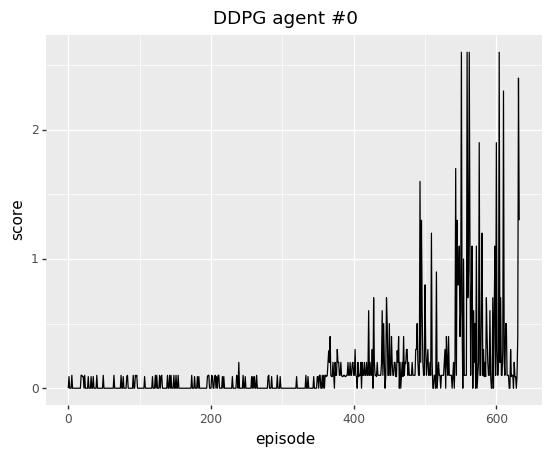

INFO:drl_cc.tennis:Ensuring output directory exists: ../training_output/tuning_ddpg/62c5680b-5abd-405b-aed2-3d8e49659778/002
Ep: 1	Sigma(13): 0.102	Score: 0.00	Avg. Score: 0.00	Time_e: 0.046s	Time: 0.046s
Ep: 2	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.041s	Time: 0.088s
Ep: 3	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.00	Time_e: 0.049s	Time: 0.137s
Ep: 4	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.044s	Time: 0.182s


<ggplot: (8730332896930)>
run #3
{'n_episodes': 3000, 'update_every': 1, 'num_updates': 5, 'buffer_size': 100000, 'batch_size': 128, 'gamma_discount_factor': 0.95, 'mean_score_threshold': 0.5, 'max_t': 1000, 'learning_rate_actor': 0.003, 'learning_rate_critic': 0.001, 'tau_soft_update': 0.003, 'l2_weight_decay': 0, 'has_ou_noise': True, 'ou_noise_mu': 0.0, 'ou_noise_theta': 0.15, 'ou_noise_sigma_start': 0.4, 'ou_noise_sigma_end': 0.05, 'ou_noise_sigma_decay': 0.9, 'n_random_episodes': 300, 'agent_seed': 11111, 'logging_freq': 1}


Ep: 5	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.00	Time_e: 0.044s	Time: 0.227s
Ep: 6	Sigma(32): 0.050	Score: 0.00	Avg. Score: 0.00	Time_e: 0.094s	Time: 0.321s
Ep: 7	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.00	Time_e: 0.048s	Time: 0.369s
Ep: 8	Sigma(57): 0.050	Score: 0.10	Avg. Score: 0.01	Time_e: 0.184s	Time: 0.554s
Ep: 9	Sigma(30): 0.050	Score: 0.10	Avg. Score: 0.02	Time_e: 0.103s	Time: 0.657s
Ep: 10	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.052s	Time: 0.710s
Ep: 11	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.045s	Time: 0.756s
Ep: 12	Sigma(30): 0.050	Score: 0.10	Avg. Score: 0.03	Time_e: 0.081s	Time: 0.838s
Ep: 13	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.042s	Time: 0.880s
Ep: 14	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.02	Time_e: 0.041s	Time: 0.922s
Ep: 15	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.040s	Time: 0.962s
Ep: 16	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.042s	Time: 1.004s
Ep: 17	Sigma(31): 0.050	Score: 0.

Ep: 107	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.02	Time_e: 0.051s	Time: 6.484s
Ep: 108	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.048s	Time: 6.533s
Ep: 109	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.046s	Time: 6.580s
Ep: 110	Sigma(32): 0.050	Score: 0.09	Avg. Score: 0.02	Time_e: 0.108s	Time: 6.689s
Ep: 111	Sigma(30): 0.050	Score: 0.09	Avg. Score: 0.02	Time_e: 0.100s	Time: 6.789s
Ep: 112	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.02	Time_e: 0.058s	Time: 6.849s
Ep: 113	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.046s	Time: 6.896s
Ep: 114	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.02	Time_e: 0.044s	Time: 6.941s
Ep: 115	Sigma(29): 0.050	Score: 0.10	Avg. Score: 0.02	Time_e: 0.096s	Time: 7.038s
Ep: 116	Sigma(31): 0.050	Score: 0.10	Avg. Score: 0.02	Time_e: 0.092s	Time: 7.130s
Ep: 117	Sigma(16): 0.074	Score: 0.00	Avg. Score: 0.02	Time_e: 0.050s	Time: 7.181s
Ep: 118	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.02	Time_e: 0.053s	Time: 7.234s
Ep: 119	Sigma(14

Ep: 207	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.041s	Time: 12.542s
Ep: 208	Sigma(31): 0.050	Score: 0.09	Avg. Score: 0.02	Time_e: 0.103s	Time: 12.646s
Ep: 209	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.02	Time_e: 0.051s	Time: 12.698s
Ep: 210	Sigma(30): 0.050	Score: 0.10	Avg. Score: 0.02	Time_e: 0.095s	Time: 12.794s
Ep: 211	Sigma(29): 0.050	Score: 0.10	Avg. Score: 0.02	Time_e: 0.092s	Time: 12.887s
Ep: 212	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.049s	Time: 12.937s
Ep: 213	Sigma(16): 0.074	Score: 0.00	Avg. Score: 0.02	Time_e: 0.053s	Time: 12.990s
Ep: 214	Sigma(16): 0.074	Score: 0.00	Avg. Score: 0.02	Time_e: 0.057s	Time: 13.048s
Ep: 215	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.049s	Time: 13.098s
Ep: 216	Sigma(30): 0.050	Score: 0.10	Avg. Score: 0.02	Time_e: 0.090s	Time: 13.189s
Ep: 217	Sigma(38): 0.050	Score: 0.10	Avg. Score: 0.02	Time_e: 0.115s	Time: 13.305s
Ep: 218	Sigma(31): 0.050	Score: 0.10	Avg. Score: 0.03	Time_e: 0.102s	Time: 13.407s
Ep: 

Ep: 306	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.928s	Time: 23.611s
Ep: 307	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 1.030s	Time: 24.642s
Ep: 308	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.02	Time_e: 0.886s	Time: 25.529s
Ep: 309	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.915s	Time: 26.444s
Ep: 310	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.02	Time_e: 1.128s	Time: 27.573s
Ep: 311	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.808s	Time: 28.383s
Ep: 312	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.02	Time_e: 0.971s	Time: 29.355s
Ep: 313	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.616s	Time: 29.971s
Ep: 314	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.615s	Time: 30.587s
Ep: 315	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.615s	Time: 31.203s
Ep: 316	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.01	Time_e: 0.712s	Time: 31.916s
Ep: 317	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.01	Time_e: 1.141s	Time: 33.057s
Ep: 

Ep: 405	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 1.057s	Time: 122.319s
Ep: 406	Sigma(33): 0.050	Score: 0.10	Avg. Score: 0.00	Time_e: 2.306s	Time: 124.625s
Ep: 407	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.00	Time_e: 0.996s	Time: 125.622s
Ep: 408	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.915s	Time: 126.537s
Ep: 409	Sigma(108): 0.050	Score: 0.30	Avg. Score: 0.00	Time_e: 7.516s	Time: 134.054s
Ep: 410	Sigma(32): 0.050	Score: 0.10	Avg. Score: 0.01	Time_e: 2.343s	Time: 136.398s
Ep: 411	Sigma(29): 0.050	Score: 0.09	Avg. Score: 0.01	Time_e: 2.172s	Time: 138.571s
Ep: 412	Sigma(32): 0.050	Score: 0.10	Avg. Score: 0.01	Time_e: 2.188s	Time: 140.760s
Ep: 413	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.01	Time_e: 1.120s	Time: 141.881s
Ep: 414	Sigma(32): 0.050	Score: 0.10	Avg. Score: 0.01	Time_e: 1.535s	Time: 143.417s
Ep: 415	Sigma(31): 0.050	Score: 0.09	Avg. Score: 0.01	Time_e: 2.133s	Time: 145.551s
Ep: 416	Sigma(73): 0.050	Score: 0.20	Avg. Score: 0.01	Time_e: 4.783s	Time: 

Ep: 503	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.10	Time_e: 0.929s	Time: 355.093s
Ep: 504	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.09	Time_e: 0.941s	Time: 356.035s
Ep: 505	Sigma(30): 0.050	Score: 0.10	Avg. Score: 0.10	Time_e: 2.012s	Time: 358.047s
Ep: 506	Sigma(31): 0.050	Score: 0.09	Avg. Score: 0.10	Time_e: 2.079s	Time: 360.126s
Ep: 507	Sigma(31): 0.050	Score: 0.10	Avg. Score: 0.10	Time_e: 2.352s	Time: 362.480s
Ep: 508	Sigma(30): 0.050	Score: 0.10	Avg. Score: 0.10	Time_e: 1.771s	Time: 364.252s
Ep: 509	Sigma(67): 0.050	Score: 0.20	Avg. Score: 0.10	Time_e: 4.454s	Time: 368.706s
Ep: 510	Sigma(66): 0.050	Score: 0.19	Avg. Score: 0.10	Time_e: 4.809s	Time: 373.516s
Ep: 511	Sigma(31): 0.050	Score: 0.10	Avg. Score: 0.10	Time_e: 2.035s	Time: 375.552s
Ep: 512	Sigma(66): 0.050	Score: 0.19	Avg. Score: 0.10	Time_e: 3.879s	Time: 379.432s
Ep: 513	Sigma(29): 0.050	Score: 0.09	Avg. Score: 0.10	Time_e: 2.084s	Time: 381.517s
Ep: 514	Sigma(31): 0.050	Score: 0.09	Avg. Score: 0.10	Time_e: 2.284s	Time: 3

Ep: 601	Sigma(127): 0.050	Score: 0.30	Avg. Score: 0.11	Time_e: 9.191s	Time: 627.958s
Ep: 602	Sigma(769): 0.050	Score: 2.00	Avg. Score: 0.13	Time_e: 51.653s	Time: 679.612s
Ep: 603	Sigma(30): 0.050	Score: 0.10	Avg. Score: 0.13	Time_e: 1.651s	Time: 681.263s
Ep: 604	Sigma(31): 0.050	Score: 0.10	Avg. Score: 0.13	Time_e: 2.008s	Time: 683.273s
Ep: 605	Sigma(68): 0.050	Score: 0.20	Avg. Score: 0.13	Time_e: 4.403s	Time: 687.677s
Ep: 606	Sigma(375): 0.050	Score: 1.00	Avg. Score: 0.14	Time_e: 24.346s	Time: 712.025s
Ep: 607	Sigma(145): 0.050	Score: 0.40	Avg. Score: 0.14	Time_e: 9.972s	Time: 721.997s
Ep: 608	Sigma(70): 0.050	Score: 0.20	Avg. Score: 0.14	Time_e: 5.375s	Time: 727.374s
Ep: 609	Sigma(1001): 0.050	Score: 2.60	Avg. Score: 0.17	Time_e: 64.878s	Time: 792.253s
Ep: 610	Sigma(3): 0.292	Score: 0.00	Avg. Score: 0.17	Time_e: 0.243s	Time: 792.497s
Ep: 611	Sigma(431): 0.050	Score: 1.10	Avg. Score: 0.18	Time_e: 31.047s	Time: 823.545s
Ep: 612	Sigma(509): 0.050	Score: 1.30	Avg. Score: 0.19	Time_e: 35.

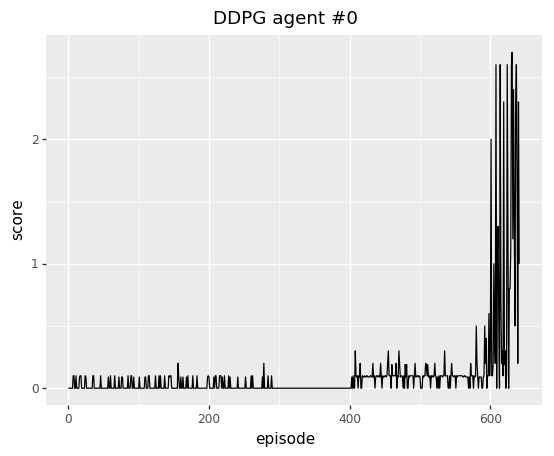

INFO:drl_cc.tennis:Ensuring output directory exists: ../training_output/tuning_ddpg/172d722d-adb4-4526-b102-464617e3b43d/001
Ep: 1	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.048s	Time: 0.048s
Ep: 2	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.052s	Time: 0.101s
Ep: 3	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.050s	Time: 0.152s


<ggplot: (8730185861468)>
run #2
{'n_episodes': 3000, 'update_every': 2, 'num_updates': 10, 'buffer_size': 1000000, 'batch_size': 1024, 'gamma_discount_factor': 0.95, 'mean_score_threshold': 0.5, 'max_t': 1000, 'learning_rate_actor': 0.003, 'learning_rate_critic': 0.001, 'tau_soft_update': 0.003, 'l2_weight_decay': 0, 'has_ou_noise': True, 'ou_noise_mu': 0.0, 'ou_noise_theta': 0.15, 'ou_noise_sigma_start': 0.4, 'ou_noise_sigma_end': 0.05, 'ou_noise_sigma_decay': 0.9, 'n_random_episodes': 300, 'agent_seed': 11111, 'logging_freq': 1}


Ep: 4	Sigma(33): 0.050	Score: 0.00	Avg. Score: 0.00	Time_e: 0.103s	Time: 0.255s
Ep: 5	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.044s	Time: 0.299s
Ep: 6	Sigma(27): 0.050	Score: 0.00	Avg. Score: 0.00	Time_e: 0.088s	Time: 0.388s
Ep: 7	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.051s	Time: 0.440s
Ep: 8	Sigma(32): 0.050	Score: 0.09	Avg. Score: 0.01	Time_e: 0.105s	Time: 0.546s
Ep: 9	Sigma(31): 0.050	Score: 0.09	Avg. Score: 0.02	Time_e: 0.096s	Time: 0.644s
Ep: 10	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.046s	Time: 0.690s
Ep: 11	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.043s	Time: 0.733s
Ep: 12	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.042s	Time: 0.776s
Ep: 13	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.01	Time_e: 0.045s	Time: 0.822s
Ep: 14	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.01	Time_e: 0.039s	Time: 0.861s
Ep: 15	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.01	Time_e: 0.039s	Time: 0.901s
Ep: 16	Sigma(33): 0.050	Score: 0.0

Ep: 106	Sigma(32): 0.050	Score: 0.10	Avg. Score: 0.02	Time_e: 0.107s	Time: 6.836s
Ep: 107	Sigma(47): 0.050	Score: 0.10	Avg. Score: 0.03	Time_e: 0.149s	Time: 6.986s
Ep: 108	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.038s	Time: 7.024s
Ep: 109	Sigma(16): 0.074	Score: 0.00	Avg. Score: 0.02	Time_e: 0.048s	Time: 7.073s
Ep: 110	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.042s	Time: 7.115s
Ep: 111	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.043s	Time: 7.159s
Ep: 112	Sigma(30): 0.050	Score: 0.10	Avg. Score: 0.02	Time_e: 0.089s	Time: 7.249s
Ep: 113	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.040s	Time: 7.290s
Ep: 114	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.043s	Time: 7.334s
Ep: 115	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.042s	Time: 7.376s
Ep: 116	Sigma(31): 0.050	Score: 0.10	Avg. Score: 0.02	Time_e: 0.102s	Time: 7.479s
Ep: 117	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.045s	Time: 7.525s
Ep: 118	Sigma(14

Ep: 206	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.02	Time_e: 0.056s	Time: 12.896s
Ep: 207	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.02	Time_e: 0.049s	Time: 12.946s
Ep: 208	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.049s	Time: 12.995s
Ep: 209	Sigma(16): 0.074	Score: 0.00	Avg. Score: 0.02	Time_e: 0.059s	Time: 13.055s
Ep: 210	Sigma(23): 0.050	Score: 0.10	Avg. Score: 0.02	Time_e: 0.076s	Time: 13.132s
Ep: 211	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.049s	Time: 13.182s
Ep: 212	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.02	Time_e: 0.055s	Time: 13.237s
Ep: 213	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.047s	Time: 13.286s
Ep: 214	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.02	Time_e: 0.057s	Time: 13.343s
Ep: 215	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.02	Time_e: 0.054s	Time: 13.397s
Ep: 216	Sigma(13): 0.102	Score: 0.00	Avg. Score: 0.02	Time_e: 0.047s	Time: 13.445s
Ep: 217	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.02	Time_e: 0.053s	Time: 13.499s
Ep: 

Ep: 305	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 1.437s	Time: 26.231s
Ep: 306	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 1.430s	Time: 27.661s
Ep: 307	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 1.429s	Time: 29.091s
Ep: 308	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 1.430s	Time: 30.522s
Ep: 309	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.02	Time_e: 1.446s	Time: 31.969s
Ep: 310	Sigma(29): 0.050	Score: 0.10	Avg. Score: 0.02	Time_e: 2.843s	Time: 34.813s
Ep: 311	Sigma(31): 0.050	Score: 0.10	Avg. Score: 0.03	Time_e: 2.956s	Time: 37.769s
Ep: 312	Sigma(30): 0.050	Score: 0.09	Avg. Score: 0.03	Time_e: 2.761s	Time: 40.532s
Ep: 313	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.03	Time_e: 1.298s	Time: 41.831s
Ep: 314	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.03	Time_e: 1.418s	Time: 43.250s
Ep: 315	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.03	Time_e: 1.306s	Time: 44.557s
Ep: 316	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.03	Time_e: 1.291s	Time: 45.848s
Ep: 

Ep: 403	Sigma(127): 0.050	Score: 0.30	Avg. Score: 0.09	Time_e: 11.975s	Time: 443.613s
Ep: 404	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.09	Time_e: 1.380s	Time: 444.993s
Ep: 405	Sigma(55): 0.050	Score: 0.10	Avg. Score: 0.09	Time_e: 5.531s	Time: 450.525s
Ep: 406	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.09	Time_e: 1.433s	Time: 451.958s
Ep: 407	Sigma(120): 0.050	Score: 0.29	Avg. Score: 0.10	Time_e: 11.636s	Time: 463.595s
Ep: 408	Sigma(65): 0.050	Score: 0.20	Avg. Score: 0.10	Time_e: 6.107s	Time: 469.703s
Ep: 409	Sigma(165): 0.050	Score: 0.40	Avg. Score: 0.10	Time_e: 16.684s	Time: 486.388s
Ep: 410	Sigma(29): 0.050	Score: 0.09	Avg. Score: 0.10	Time_e: 2.643s	Time: 489.032s
Ep: 411	Sigma(51): 0.050	Score: 0.10	Avg. Score: 0.10	Time_e: 4.679s	Time: 493.712s
Ep: 412	Sigma(32): 0.050	Score: 0.10	Avg. Score: 0.10	Time_e: 3.005s	Time: 496.717s
Ep: 413	Sigma(69): 0.050	Score: 0.20	Avg. Score: 0.10	Time_e: 6.920s	Time: 503.637s
Ep: 414	Sigma(16): 0.074	Score: 0.00	Avg. Score: 0.10	Time_e: 1.664s	T

Ep: 500	Sigma(122): 0.050	Score: 0.30	Avg. Score: 0.16	Time_e: 12.746s	Time: 1076.281s
Ep: 501	Sigma(19): 0.054	Score: 0.00	Avg. Score: 0.16	Time_e: 1.887s	Time: 1078.168s
Ep: 502	Sigma(65): 0.050	Score: 0.10	Avg. Score: 0.16	Time_e: 6.878s	Time: 1085.047s
Ep: 503	Sigma(32): 0.050	Score: 0.10	Avg. Score: 0.15	Time_e: 3.313s	Time: 1088.361s
Ep: 504	Sigma(291): 0.050	Score: 0.70	Avg. Score: 0.16	Time_e: 30.927s	Time: 1119.289s
Ep: 505	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.16	Time_e: 1.418s	Time: 1120.708s
Ep: 506	Sigma(37): 0.050	Score: 0.10	Avg. Score: 0.16	Time_e: 3.744s	Time: 1124.453s
Ep: 507	Sigma(52): 0.050	Score: 0.10	Avg. Score: 0.16	Time_e: 5.325s	Time: 1129.779s
Ep: 508	Sigma(16): 0.074	Score: 0.00	Avg. Score: 0.16	Time_e: 1.577s	Time: 1131.357s
Ep: 509	Sigma(24): 0.050	Score: 0.10	Avg. Score: 0.15	Time_e: 2.443s	Time: 1133.800s
Ep: 510	Sigma(31): 0.050	Score: 0.10	Avg. Score: 0.15	Time_e: 3.176s	Time: 1136.977s
Ep: 511	Sigma(47): 0.050	Score: 0.10	Avg. Score: 0.15	Time_e:

Ep: 596	Sigma(52): 0.050	Score: 0.10	Avg. Score: 0.21	Time_e: 5.378s	Time: 1971.053s
Ep: 597	Sigma(51): 0.050	Score: 0.10	Avg. Score: 0.21	Time_e: 5.256s	Time: 1976.310s
Ep: 598	Sigma(47): 0.050	Score: 0.10	Avg. Score: 0.21	Time_e: 4.529s	Time: 1980.840s
Ep: 599	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.21	Time_e: 1.353s	Time: 1982.193s
Ep: 600	Sigma(261): 0.050	Score: 0.70	Avg. Score: 0.22	Time_e: 25.977s	Time: 2008.171s
Ep: 601	Sigma(19): 0.054	Score: 0.00	Avg. Score: 0.22	Time_e: 2.008s	Time: 2010.180s
Ep: 602	Sigma(338): 0.050	Score: 0.80	Avg. Score: 0.22	Time_e: 38.111s	Time: 2048.292s
Ep: 603	Sigma(20): 0.050	Score: 0.00	Avg. Score: 0.22	Time_e: 2.218s	Time: 2050.511s
Ep: 604	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.22	Time_e: 1.500s	Time: 2052.012s
Ep: 605	Sigma(27): 0.050	Score: 0.00	Avg. Score: 0.22	Time_e: 2.768s	Time: 2054.781s
Ep: 606	Sigma(599): 0.050	Score: 1.60	Avg. Score: 0.23	Time_e: 62.647s	Time: 2117.429s
Ep: 607	Sigma(53): 0.050	Score: 0.19	Avg. Score: 0.23	Time_

Ep: 691	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.47	Time_e: 1.400s	Time: 3865.236s
Ep: 692	Sigma(42): 0.050	Score: 0.10	Avg. Score: 0.46	Time_e: 4.335s	Time: 3869.572s
Ep: 693	Sigma(832): 0.050	Score: 2.20	Avg. Score: 0.48	Time_e: 89.754s	Time: 3959.326s
Ep: 694	Sigma(148): 0.050	Score: 0.40	Avg. Score: 0.48	Time_e: 15.577s	Time: 3974.905s
Ep: 695	Sigma(923): 0.050	Score: 2.40	Avg. Score: 0.50	Time_e: 98.152s	Time: 4073.057s
INFO:drl_cc.tennis:
Environment solved in 595 episodes!
Score: 2.40	Average Score: 0.50	Average Time_e: 5.860s	Total Time: 4073.057s
INFO:drl_cc.tennis:Saving actor network model weights to ../training_output/tuning_ddpg/172d722d-adb4-4526-b102-464617e3b43d/001/weights_actor.pth
INFO:drl_cc.tennis:Actor model weights saved successfully!
INFO:drl_cc.tennis:Saving critic network model weights to ../training_output/tuning_ddpg/172d722d-adb4-4526-b102-464617e3b43d/001/weights_critic.pth
INFO:drl_cc.tennis:Critic model weights saved successfully!
INFO:drl_cc.tennis:Sa

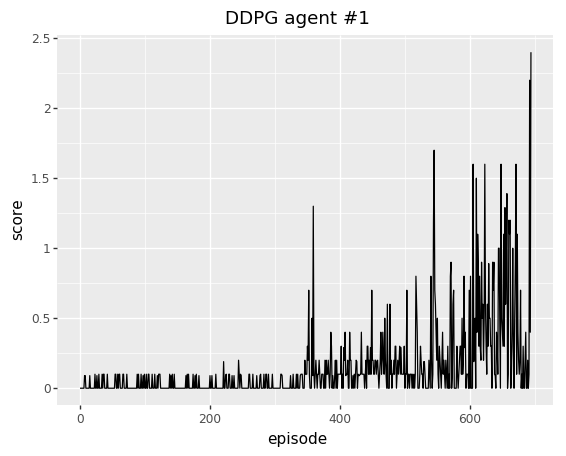

INFO:drl_cc.tennis:Ensuring output directory exists: ../training_output/tuning_ddpg/172d722d-adb4-4526-b102-464617e3b43d/002
Ep: 1	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.054s	Time: 0.054s
Ep: 2	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.048s	Time: 0.102s
Ep: 3	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.054s	Time: 0.157s


<ggplot: (-9223363306528412100)>
run #3
{'n_episodes': 3000, 'update_every': 2, 'num_updates': 10, 'buffer_size': 1000000, 'batch_size': 1024, 'gamma_discount_factor': 0.95, 'mean_score_threshold': 0.5, 'max_t': 1000, 'learning_rate_actor': 0.003, 'learning_rate_critic': 0.001, 'tau_soft_update': 0.003, 'l2_weight_decay': 0, 'has_ou_noise': True, 'ou_noise_mu': 0.0, 'ou_noise_theta': 0.15, 'ou_noise_sigma_start': 0.4, 'ou_noise_sigma_end': 0.05, 'ou_noise_sigma_decay': 0.9, 'n_random_episodes': 300, 'agent_seed': 11111, 'logging_freq': 1}


Ep: 4	Sigma(19): 0.054	Score: 0.00	Avg. Score: 0.00	Time_e: 0.067s	Time: 0.225s
Ep: 5	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.045s	Time: 0.270s
Ep: 6	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.00	Time_e: 0.051s	Time: 0.323s
Ep: 7	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.044s	Time: 0.367s
Ep: 8	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.043s	Time: 0.411s
Ep: 9	Sigma(26): 0.050	Score: 0.10	Avg. Score: 0.01	Time_e: 0.089s	Time: 0.501s
Ep: 10	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.01	Time_e: 0.048s	Time: 0.550s
Ep: 11	Sigma(31): 0.050	Score: 0.10	Avg. Score: 0.02	Time_e: 0.097s	Time: 0.648s
Ep: 12	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.049s	Time: 0.699s
Ep: 13	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.046s	Time: 0.746s
Ep: 14	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.01	Time_e: 0.049s	Time: 0.795s
Ep: 15	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.01	Time_e: 0.047s	Time: 0.842s
Ep: 16	Sigma(31): 0.050	Score: 0.0

Ep: 106	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.042s	Time: 5.919s
Ep: 107	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.041s	Time: 5.961s
Ep: 108	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.044s	Time: 6.005s
Ep: 109	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.02	Time_e: 0.050s	Time: 6.055s
Ep: 110	Sigma(13): 0.102	Score: 0.00	Avg. Score: 0.02	Time_e: 0.044s	Time: 6.100s
Ep: 111	Sigma(31): 0.050	Score: 0.10	Avg. Score: 0.02	Time_e: 0.096s	Time: 6.196s
Ep: 112	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.048s	Time: 6.245s
Ep: 113	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.046s	Time: 6.291s
Ep: 114	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.042s	Time: 6.334s
Ep: 115	Sigma(17): 0.067	Score: 0.00	Avg. Score: 0.02	Time_e: 0.049s	Time: 6.384s
Ep: 116	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.01	Time_e: 0.041s	Time: 6.426s
Ep: 117	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.01	Time_e: 0.042s	Time: 6.468s
Ep: 118	Sigma(15

Ep: 206	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.01	Time_e: 0.051s	Time: 11.863s
Ep: 207	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.01	Time_e: 0.046s	Time: 11.909s
Ep: 208	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.01	Time_e: 0.053s	Time: 11.963s
Ep: 209	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.01	Time_e: 0.049s	Time: 12.013s
Ep: 210	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.01	Time_e: 0.049s	Time: 12.063s
Ep: 211	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.01	Time_e: 0.049s	Time: 12.112s
Ep: 212	Sigma(32): 0.050	Score: 0.09	Avg. Score: 0.01	Time_e: 0.110s	Time: 12.223s
Ep: 213	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.01	Time_e: 0.049s	Time: 12.273s
Ep: 214	Sigma(16): 0.074	Score: 0.00	Avg. Score: 0.01	Time_e: 0.059s	Time: 12.333s
Ep: 215	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.01	Time_e: 0.048s	Time: 12.382s
Ep: 216	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.01	Time_e: 0.045s	Time: 12.428s
Ep: 217	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.01	Time_e: 0.045s	Time: 12.474s
Ep: 

Ep: 305	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 1.412s	Time: 24.776s
Ep: 306	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 1.423s	Time: 26.199s
Ep: 307	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 1.317s	Time: 27.517s
Ep: 308	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.02	Time_e: 1.345s	Time: 28.862s
Ep: 309	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 1.436s	Time: 30.299s
Ep: 310	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 1.388s	Time: 31.689s
Ep: 311	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 1.411s	Time: 33.101s
Ep: 312	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 1.392s	Time: 34.493s
Ep: 313	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.02	Time_e: 1.355s	Time: 35.849s
Ep: 314	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 1.432s	Time: 37.281s
Ep: 315	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 1.424s	Time: 38.706s
Ep: 316	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 1.349s	Time: 40.056s
Ep: 

Ep: 404	Sigma(147): 0.050	Score: 0.40	Avg. Score: 0.06	Time_e: 15.099s	Time: 311.507s
Ep: 405	Sigma(52): 0.050	Score: 0.10	Avg. Score: 0.06	Time_e: 5.320s	Time: 316.828s
Ep: 406	Sigma(29): 0.050	Score: 0.10	Avg. Score: 0.06	Time_e: 2.995s	Time: 319.824s
Ep: 407	Sigma(90): 0.050	Score: 0.20	Avg. Score: 0.06	Time_e: 9.200s	Time: 329.026s
Ep: 408	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.06	Time_e: 1.476s	Time: 330.502s
Ep: 409	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.06	Time_e: 1.472s	Time: 331.975s
Ep: 410	Sigma(29): 0.050	Score: 0.10	Avg. Score: 0.06	Time_e: 2.860s	Time: 334.837s
Ep: 411	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.06	Time_e: 1.418s	Time: 336.256s
Ep: 412	Sigma(31): 0.050	Score: 0.10	Avg. Score: 0.07	Time_e: 2.958s	Time: 339.214s
Ep: 413	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.07	Time_e: 1.451s	Time: 340.666s
Ep: 414	Sigma(30): 0.050	Score: 0.10	Avg. Score: 0.07	Time_e: 3.145s	Time: 343.812s
Ep: 415	Sigma(16): 0.074	Score: 0.00	Avg. Score: 0.07	Time_e: 1.669s	Time:

Ep: 502	Sigma(67): 0.050	Score: 0.20	Avg. Score: 0.13	Time_e: 6.856s	Time: 840.663s
Ep: 503	Sigma(188): 0.050	Score: 0.50	Avg. Score: 0.13	Time_e: 19.041s	Time: 859.705s
Ep: 504	Sigma(53): 0.050	Score: 0.10	Avg. Score: 0.13	Time_e: 5.271s	Time: 864.976s
Ep: 505	Sigma(32): 0.050	Score: 0.10	Avg. Score: 0.13	Time_e: 3.288s	Time: 868.265s
Ep: 506	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.13	Time_e: 1.455s	Time: 869.720s
Ep: 507	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.13	Time_e: 1.400s	Time: 871.121s
Ep: 508	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.13	Time_e: 1.346s	Time: 872.467s
Ep: 509	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.13	Time_e: 1.379s	Time: 873.847s
Ep: 510	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.12	Time_e: 1.371s	Time: 875.219s
Ep: 511	Sigma(121): 0.050	Score: 0.30	Avg. Score: 0.13	Time_e: 11.392s	Time: 886.612s
Ep: 512	Sigma(22): 0.050	Score: 0.00	Avg. Score: 0.13	Time_e: 2.196s	Time: 888.809s
Ep: 513	Sigma(80): 0.050	Score: 0.20	Avg. Score: 0.13	Time_e: 8.082s	Tim

Ep: 599	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.18	Time_e: 1.394s	Time: 1594.005s
Ep: 600	Sigma(95): 0.050	Score: 0.20	Avg. Score: 0.18	Time_e: 9.731s	Time: 1603.737s
Ep: 601	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.18	Time_e: 1.481s	Time: 1605.218s
Ep: 602	Sigma(50): 0.050	Score: 0.09	Avg. Score: 0.18	Time_e: 5.238s	Time: 1610.457s
Ep: 603	Sigma(205): 0.050	Score: 0.50	Avg. Score: 0.18	Time_e: 21.491s	Time: 1631.949s
Ep: 604	Sigma(48): 0.050	Score: 0.10	Avg. Score: 0.18	Time_e: 5.047s	Time: 1636.997s
Ep: 605	Sigma(101): 0.050	Score: 0.20	Avg. Score: 0.18	Time_e: 10.597s	Time: 1647.594s
Ep: 606	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.18	Time_e: 1.487s	Time: 1649.082s
Ep: 607	Sigma(52): 0.050	Score: 0.10	Avg. Score: 0.18	Time_e: 5.464s	Time: 1654.547s
Ep: 608	Sigma(225): 0.050	Score: 0.60	Avg. Score: 0.19	Time_e: 23.651s	Time: 1678.199s
Ep: 609	Sigma(215): 0.050	Score: 0.50	Avg. Score: 0.19	Time_e: 22.038s	Time: 1700.238s
Ep: 610	Sigma(110): 0.050	Score: 0.30	Avg. Score: 0.19	Ti

Ep: 695	Sigma(19): 0.054	Score: 0.09	Avg. Score: 0.17	Time_e: 1.845s	Time: 2328.821s
Ep: 696	Sigma(32): 0.050	Score: 0.10	Avg. Score: 0.17	Time_e: 3.300s	Time: 2332.122s
Ep: 697	Sigma(16): 0.074	Score: 0.00	Avg. Score: 0.17	Time_e: 1.623s	Time: 2333.745s
Ep: 698	Sigma(126): 0.050	Score: 0.30	Avg. Score: 0.18	Time_e: 12.530s	Time: 2346.276s
Ep: 699	Sigma(127): 0.050	Score: 0.30	Avg. Score: 0.18	Time_e: 13.155s	Time: 2359.432s
Ep: 700	Sigma(20): 0.050	Score: 0.00	Avg. Score: 0.18	Time_e: 2.131s	Time: 2361.564s
Ep: 701	Sigma(51): 0.050	Score: 0.10	Avg. Score: 0.18	Time_e: 4.869s	Time: 2366.434s
Ep: 702	Sigma(32): 0.050	Score: 0.09	Avg. Score: 0.18	Time_e: 3.048s	Time: 2369.483s
Ep: 703	Sigma(25): 0.050	Score: 0.10	Avg. Score: 0.17	Time_e: 2.623s	Time: 2372.106s
Ep: 704	Sigma(105): 0.050	Score: 0.29	Avg. Score: 0.18	Time_e: 10.940s	Time: 2383.047s
Ep: 705	Sigma(143): 0.050	Score: 0.39	Avg. Score: 0.18	Time_e: 15.433s	Time: 2398.481s
Ep: 706	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.18	Tim

Ep: 791	Sigma(13): 0.102	Score: 0.00	Avg. Score: 0.27	Time_e: 1.244s	Time: 3484.262s
Ep: 792	Sigma(29): 0.050	Score: 0.10	Avg. Score: 0.27	Time_e: 3.038s	Time: 3487.301s
Ep: 793	Sigma(30): 0.050	Score: 0.10	Avg. Score: 0.27	Time_e: 3.017s	Time: 3490.319s
Ep: 794	Sigma(365): 0.050	Score: 0.90	Avg. Score: 0.28	Time_e: 38.237s	Time: 3528.557s
Ep: 795	Sigma(127): 0.050	Score: 0.30	Avg. Score: 0.28	Time_e: 12.994s	Time: 3541.552s
Ep: 796	Sigma(147): 0.050	Score: 0.40	Avg. Score: 0.28	Time_e: 15.582s	Time: 3557.134s
Ep: 797	Sigma(31): 0.050	Score: 0.10	Avg. Score: 0.29	Time_e: 3.301s	Time: 3560.436s
Ep: 798	Sigma(56): 0.050	Score: 0.19	Avg. Score: 0.28	Time_e: 6.239s	Time: 3566.675s
Ep: 799	Sigma(33): 0.050	Score: 0.10	Avg. Score: 0.28	Time_e: 3.506s	Time: 3570.182s
Ep: 800	Sigma(40): 0.050	Score: 0.10	Avg. Score: 0.28	Time_e: 4.367s	Time: 3574.549s
Ep: 801	Sigma(32): 0.050	Score: 0.09	Avg. Score: 0.28	Time_e: 3.479s	Time: 3578.029s
Ep: 802	Sigma(143): 0.050	Score: 0.40	Avg. Score: 0.29	Time

Ep: 887	Sigma(320): 0.050	Score: 0.80	Avg. Score: 0.34	Time_e: 35.912s	Time: 4924.120s
Ep: 888	Sigma(47): 0.050	Score: 0.10	Avg. Score: 0.34	Time_e: 5.222s	Time: 4929.343s
Ep: 889	Sigma(123): 0.050	Score: 0.30	Avg. Score: 0.34	Time_e: 13.471s	Time: 4942.815s
Ep: 890	Sigma(77): 0.050	Score: 0.20	Avg. Score: 0.34	Time_e: 8.253s	Time: 4951.068s
Ep: 891	Sigma(55): 0.050	Score: 0.10	Avg. Score: 0.34	Time_e: 5.807s	Time: 4956.877s
Ep: 892	Sigma(182): 0.050	Score: 0.50	Avg. Score: 0.35	Time_e: 19.988s	Time: 4976.866s
Ep: 893	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.34	Time_e: 1.526s	Time: 4978.392s
Ep: 894	Sigma(19): 0.054	Score: 0.00	Avg. Score: 0.34	Time_e: 2.029s	Time: 4980.421s
Ep: 895	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.33	Time_e: 1.578s	Time: 4982.000s
Ep: 896	Sigma(19): 0.054	Score: 0.00	Avg. Score: 0.33	Time_e: 2.031s	Time: 4984.032s
Ep: 897	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.33	Time_e: 1.555s	Time: 4985.588s
Ep: 898	Sigma(16): 0.074	Score: 0.00	Avg. Score: 0.33	Time_

Ep: 983	Sigma(36): 0.050	Score: 0.10	Avg. Score: 0.35	Time_e: 4.284s	Time: 6352.459s
Ep: 984	Sigma(90): 0.050	Score: 0.20	Avg. Score: 0.34	Time_e: 10.440s	Time: 6362.900s
Ep: 985	Sigma(186): 0.050	Score: 0.50	Avg. Score: 0.34	Time_e: 21.275s	Time: 6384.176s
Ep: 986	Sigma(107): 0.050	Score: 0.20	Avg. Score: 0.33	Time_e: 12.349s	Time: 6396.526s
Ep: 987	Sigma(33): 0.050	Score: 0.10	Avg. Score: 0.32	Time_e: 3.620s	Time: 6400.147s
Ep: 988	Sigma(461): 0.050	Score: 1.19	Avg. Score: 0.34	Time_e: 53.344s	Time: 6453.492s
Ep: 989	Sigma(83): 0.050	Score: 0.20	Avg. Score: 0.33	Time_e: 9.701s	Time: 6463.194s
Ep: 990	Sigma(78): 0.050	Score: 0.10	Avg. Score: 0.33	Time_e: 9.305s	Time: 6472.500s
Ep: 991	Sigma(525): 0.050	Score: 1.40	Avg. Score: 0.35	Time_e: 61.685s	Time: 6534.186s
Ep: 992	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.34	Time_e: 1.690s	Time: 6535.877s
Ep: 993	Sigma(468): 0.050	Score: 1.20	Avg. Score: 0.35	Time_e: 53.310s	Time: 6589.188s
Ep: 994	Sigma(1001): 0.050	Score: 2.60	Avg. Score: 0.3

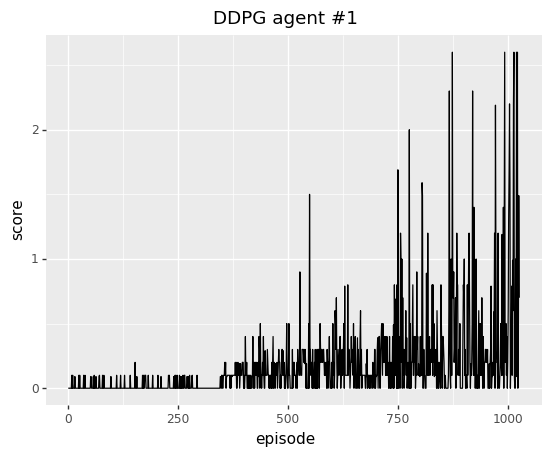

<ggplot: (-9223363306593378055)>


In [6]:
num_runs_per_paramset = 2
for i, p in enumerate(candidate_params, start=0):
    u_name = str(uuid.uuid4())
    for j in range(1, num_runs_per_paramset + 1):
        print(f"run #{j}")
        training_params = {**default_params, **p}
        print(training_params)
        out_dir = tuning_output_dir.joinpath(u_name).joinpath(f'{j:03d}')
        out_dir.mkdir(parents=True, exist_ok=True)
        with open(out_dir.joinpath("training_params.json"), "w") as f:
            json.dump(training_params, f, indent=2)

        tennis.training(env, out_dir, **training_params)

        df_scores = su.read_scores(out_dir)
        p_scores = su.plot_scores(df_scores, f"DDPG agent #{i}")
        print(p_scores)

In [7]:
env.close()

In [8]:
! tree ../training_output/tuning_ddpg

../training_output/tuning_ddpg
├── 172d722d-adb4-4526-b102-464617e3b43d
│   ├── 001
│   │   ├── metadata.json
│   │   ├── scores.csv
│   │   ├── training_params.json
│   │   ├── weights_actor.pth
│   │   └── weights_critic.pth
│   └── 002
│       ├── metadata.json
│       ├── scores.csv
│       ├── training_params.json
│       ├── weights_actor.pth
│       └── weights_critic.pth
└── 62c5680b-5abd-405b-aed2-3d8e49659778
    ├── 001
    │   ├── metadata.json
    │   ├── scores.csv
    │   ├── training_params.json
    │   ├── weights_actor.pth
    │   └── weights_critic.pth
    └── 002
        ├── metadata.json
        ├── scores.csv
        ├── training_params.json
        ├── weights_actor.pth
        └── weights_critic.pth

6 directories, 20 files
